In [8]:
from bs4 import BeautifulSoup # For HTML parsing
import urllib # Website connections
import re # Regular expressions
import pandas as pd # For converting results to a dataframe and bar chart plots
import numpy as np
import unidecode

Web scraping players market marketvalue

In [132]:
league_list = ['GB1','ES1','L1','IT1','FR1','MLS1', 'UCL']
league_name = ['EPL','LaLiga','Bundesliga','SerieA','Ligue1','MLS','UCL']
players = []

for x, y in zip(league_list, league_name):
    if x == 'UCL':
        page_url = 'https://www.transfermarkt.co.uk/uefa-champions-league/teilnehmer/pokalwettbewerb/CL/saison_id/2018'
        page_request = urllib.request.Request(page_url, headers={'User-Agent': 'Mozilla/5.0'})
        page_source = urllib.request.urlopen(page_request).read()
        club = BeautifulSoup(page_source, 'html.parser')
        
    else:
        page_url = 'https://www.transfermarkt.co.uk/jumplist/startseite/wettbewerb/'+ x
        page_request = urllib.request.Request(page_url, headers={'User-Agent': 'Mozilla/5.0'})
        page_source = urllib.request.urlopen(page_request).read()
        soup = BeautifulSoup(page_source, 'html.parser')
        club = soup.find(id="yw1")
        
    club_odd = club.find_all(class_="odd")
    club_even = club.find_all(class_="even")
    club_all = club_odd + club_even
    
    link_club = []
    for club in club_all:
        url = club.find(class_="vereinprofil_tooltip")
        link_club.append("https://www.transfermarkt.co.uk" + url['href'])
    for link in link_club:
        page_url = link
        page_request = urllib.request.Request(page_url, headers={'User-Agent': 'Mozilla/5.0'})
        page_source = urllib.request.urlopen(page_request).read()
        soup = BeautifulSoup(page_source, 'html.parser')
        club_name = soup.find(itemprop="name").get_text().split('\n')[1]
        player = soup.find(id="yw1")
        player_odd = player.find_all(class_="odd")
        player_even = player.find_all(class_="even")
        player_all = player_odd + player_even
        for player in player_all:
            player_name = player.find(class_="spielprofil_tooltip").get_text()
            player_value = player.find(class_="rechts hauptlink").get_text()
            player_age = player.find_all(class_="zentriert")[1].get_text(),
            player_position = list(player.find(class_="inline-table").children)[1].get_text(),
            player_nationality = player.find(class_="flaggenrahmen")['title']
            players.append([y, club_name, player_name, player_age[0][-3:-1], player_position[0], player_nationality, player_value])

In [133]:
players_data = pd.DataFrame(players, columns = ['League', 'Club','Name', 'Age', 'Position', 'Nationality', 'Market_Value'])

In [134]:
players_data

,League,Club,Name,Age,Position,Nationality,Market_Value
0,EPL,Manchester City,Ederson,25,Goalkeeper,Brazil,£54.00m
1,EPL,Manchester City,Arijanet Muric,19,Goalkeeper,Kosovo,£450k
2,EPL,Manchester City,Aymeric Laporte,24,Centre-Back,France,£45.00m
3,EPL,Manchester City,Eliaquim Mangala,27,Centre-Back,France,£13.50m
4,EPL,Manchester City,Philippe Sandler,21,Centre-Back,Netherlands,£2.25m
5,EPL,Manchester City,Kyle Walker,28,Right-Back,England,£45.00m
6,EPL,Manchester City,Fernandinho,33,Defensive Midfield,Brazil,£13.50m
7,EPL,Manchester City,Fabian Delph,28,Central Midfield,England,£13.50m
8,EPL,Manchester City,Phil Foden,18,Central Midfield,England,£13.50m
9,EPL,Manchester City,David Silva,32,Attacking Midfield,Spain,£27.00m


In [420]:
players_data['Name_en'] = players_data['Name'].apply(unidecode.unidecode)
players_data['Club_en'] = players_data['Club'].apply(unidecode.unidecode)

Convert Pound to CAD

In [421]:
page_url = 'https://www.x-rates.com/calculator/?from=GBP&to=CAD&amount=1'
page_request = urllib.request.Request(page_url, headers={'User-Agent': 'Mozilla/5.0'})
page_source = urllib.request.urlopen(page_request).read()
soup = BeautifulSoup(page_source, 'html.parser')
cad = soup.find(class_='ccOutputRslt').get_text()
cad_n = float(re.findall('\d+\.\d+', cad)[0])

In [422]:
m = players_data['Market_Value'].str.extract('(\d+.?\d+)m').convert_objects(convert_numeric=True)*cad_n*1000000
k = players_data['Market_Value'].str.extract('(\d+.?\d+)k').convert_objects(convert_numeric=True)*cad_n*1000

players_data['Market_Value_CAD'] = m.fillna(k)

C:\Users\taeho\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\Users\taeho\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [423]:
players_data.to_csv("players.csv", index= False)

In [9]:
players_data = pd.read_csv("players.csv")

In [10]:
pd.options.display.float_format = '{:,.2f}'.format

In [11]:
players_data

,League,Club,Name,Age,Position,Nationality,Market_Value,Name_en,Club_en,Market_Value_CAD
0,EPL,Manchester City,Ederson,25,Goalkeeper,Brazil,£54.00m,Ederson,Manchester City,"90,758,286.00"
1,EPL,Manchester City,Arijanet Muric,19,Goalkeeper,Kosovo,£450k,Arijanet Muric,Manchester City,"756,319.05"
2,EPL,Manchester City,Aymeric Laporte,24,Centre-Back,France,£45.00m,Aymeric Laporte,Manchester City,"75,631,905.00"
3,EPL,Manchester City,Eliaquim Mangala,27,Centre-Back,France,£13.50m,Eliaquim Mangala,Manchester City,"22,689,571.50"
4,EPL,Manchester City,Philippe Sandler,21,Centre-Back,Netherlands,£2.25m,Philippe Sandler,Manchester City,"3,781,595.25"
5,EPL,Manchester City,Kyle Walker,28,Right-Back,England,£45.00m,Kyle Walker,Manchester City,"75,631,905.00"
6,EPL,Manchester City,Fernandinho,33,Defensive Midfield,Brazil,£13.50m,Fernandinho,Manchester City,"22,689,571.50"
7,EPL,Manchester City,Fabian Delph,28,Central Midfield,England,£13.50m,Fabian Delph,Manchester City,"22,689,571.50"
8,EPL,Manchester City,Phil Foden,18,Central Midfield,England,£13.50m,Phil Foden,Manchester City,"22,689,571.50"
9,EPL,Manchester City,David Silva,32,Attacking Midfield,Spain,£27.00m,David Silva,Manchester City,"45,379,143.00"


In [16]:
players_data[players_data['League']!= 'UCL'].sort_values('Market_Value_CAD', ascending=False)

,League,Club,Name,Age,Position,Nationality,Market_Value,Name_en,Club_en,Market_Value_CAD
538,LaLiga,FC Barcelona,Lionel Messi,31,Right Winger,Argentina,£162.00m,Lionel Messi,FC Barcelona,"272,274,858.00"
2085,Ligue1,Paris Saint-Germain,Kylian Mbappé,19,Right Winger,France,£162.00m,Kylian Mbappe,Paris Saint-Germain,"272,274,858.00"
2084,Ligue1,Paris Saint-Germain,Neymar,26,Left Winger,Brazil,£162.00m,Neymar,Paris Saint-Germain,"272,274,858.00"
36,EPL,Chelsea FC,Eden Hazard,27,Left Winger,Belgium,£135.00m,Eden Hazard,Chelsea FC,"226,895,715.00"
21,EPL,Manchester City,Kevin De Bruyne,27,Attacking Midfield,Belgium,£135.00m,Kevin De Bruyne,Manchester City,"226,895,715.00"
304,EPL,Tottenham Hotspur,Harry Kane,25,Centre-Forward,England,£135.00m,Harry Kane,Tottenham Hotspur,"226,895,715.00"
264,EPL,Liverpool FC,Mohamed Salah,26,Right Winger,Egypt,£135.00m,Mohamed Salah,Liverpool FC,"226,895,715.00"
558,LaLiga,Atlético Madrid,Antoine Griezmann,27,Centre-Forward,France,£108.00m,Antoine Griezmann,Atletico Madrid,"181,516,572.00"
537,LaLiga,FC Barcelona,Philippe Coutinho,26,Attacking Midfield,Brazil,£108.00m,Philippe Coutinho,FC Barcelona,"181,516,572.00"
1535,SerieA,Juventus FC,Paulo Dybala,24,Second Striker,Argentina,£99.00m,Paulo Dybala,Juventus FC,"166,390,191.00"


Getting all match results for this season from the top 5 league in Europe

In [5]:
league_list = ['GB1','ES1','L1','IT1','FR1']
league_name = ['EPL','LaLiga','Bundesliga','SerieA','Ligue1']
match_num = []

for x, y in zip(league_list, league_name):
    for n in range(1,11):
        page_url = 'https://www.transfermarkt.co.uk/premier-league/spieltag/wettbewerb/'+ x + '/plus/?saison_id=2018&spieltag=' + str(n)
        page_request = urllib.request.Request(page_url, headers={'User-Agent': 'Mozilla/5.0'})
        page_source = urllib.request.urlopen(page_request).read()
        soup = BeautifulSoup(page_source, 'html.parser')
        lst = soup.find_all(class_="ergebnis-link")
        for l in lst:
            match_num.append([y, l['id']])

In [6]:
match_num

[['EPL', '3050172'],
 ['EPL', '3050173'],
 ['EPL', '3050168'],
 ['EPL', '3050169'],
 ['EPL', '3050175'],
 ['EPL', '3050170'],
 ['EPL', '3050176'],
 ['EPL', '3050171'],
 ['EPL', '3050174'],
 ['EPL', '3050167'],
 ['EPL', '3050179'],
 ['EPL', '3050183'],
 ['EPL', '3050186'],
 ['EPL', '3050182'],
 ['EPL', '3050185'],
 ['EPL', '3050180'],
 ['EPL', '3050178'],
 ['EPL', '3050184'],
 ['EPL', '3050177'],
 ['EPL', '3050181'],
 ['EPL', '3050196'],
 ['EPL', '3050187'],
 ['EPL', '3050190'],
 ['EPL', '3050188'],
 ['EPL', '3050194'],
 ['EPL', '3050191'],
 ['EPL', '3050195'],
 ['EPL', '3050189'],
 ['EPL', '3050193'],
 ['EPL', '3050192'],
 ['EPL', '3050203'],
 ['EPL', '3050197'],
 ['EPL', '3050200'],
 ['EPL', '3050206'],
 ['EPL', '3050201'],
 ['EPL', '3050202'],
 ['EPL', '3050204'],
 ['EPL', '3050199'],
 ['EPL', '3050198'],
 ['EPL', '3050205'],
 ['EPL', '3050214'],
 ['EPL', '3050207'],
 ['EPL', '3050210'],
 ['EPL', '3050208'],
 ['EPL', '3050211'],
 ['EPL', '3050212'],
 ['EPL', '3050215'],
 ['EPL', '305

In [7]:
player_lst = []
for x in match_num:
    page_url = 'https://www.transfermarkt.co.uk/chelsea-fc_manchester-united/aufstellung/spielbericht/' + x[1]
    page_request = urllib.request.Request(page_url, headers={'User-Agent': 'Mozilla/5.0'})
    page_source = urllib.request.urlopen(page_request).read()
    soup = BeautifulSoup(page_source, 'html.parser')
    home = soup.find_all(class_="sb-vereinslink")[0].get_text()
    visit = soup.find_all(class_="sb-vereinslink")[2].get_text()
    players = soup.find_all(class_='wichtig')
    score = soup.find(class_="sb-endstand").get_text()[-9:-6]
    lineup_home = []
    lineup_visit = []
    for y in players[:11]:
        lineup_home.append(y.get_text())
    for z in players[11:22]:
        lineup_visit.append(z.get_text())
    diff = int(score[0]) - int(score[2])
    player_lst.append([x[0], home, visit, lineup_home, lineup_visit, score, diff])    

In [8]:
match = pd.DataFrame(player_lst, columns = ['League','Home', 'Visit', 'Lineup_Home', 'Lineup_Visit', 'Score', 'Diff'])

In [9]:
match

,League,Home,Visit,Lineup_Home,Lineup_Visit,Score,Diff
0,EPL,Manchester United,Leicester City,"[David de Gea, Victor Lindelöf, Eric Bailly, L...","[Kasper Schmeichel, Wes Morgan, Harry Maguire,...",2:1,1
1,EPL,Newcastle United,Tottenham Hotspur,"[Martin Dubravka, Ciaran Clark, Jamaal Lascell...","[Hugo Lloris, Jan Vertonghen, Davinson Sánchez...",1:2,-1
2,EPL,AFC Bournemouth,Cardiff City,"[Asmir Begovic, Nathan Aké, Steve Cook, Charli...","[Neil Etheridge, Sean Morrison, Bruno Ecuele M...",2:0,2
3,EPL,Fulham FC,Crystal Palace,"[Fabri, Maxime Le Marchand, Calum Chambers, Jo...","[Wayne Hennessey, Mamadou Sakho, James Tomkins...",0:2,-2
4,EPL,Watford FC,Brighton & Hove Albion,"[Ben Foster, Craig Cathcart, Christian Kabasel...","[Mathew Ryan, Shane Duffy, Lewis Dunk, Bernard...",2:0,2
5,EPL,Huddersfield Town,Chelsea FC,"[Ben Hamer, Terence Kongolo, Zanka, Christophe...","[Kepa, Antonio Rüdiger, David Luiz, Marcos Alo...",0:3,-3
6,EPL,Wolverhampton Wanderers,Everton FC,"[Rui Patrício, Ryan Bennett, Willy Boly, Conor...","[Jordan Pickford, Michael Keane, Phil Jagielka...",2:2,0
7,EPL,Liverpool FC,West Ham United,"[Alisson, Virgil van Dijk, Joe Gomez, Andrew R...","[Lukasz Fabianski, Angelo Ogbonna, Fabián Balb...",4:0,4
8,EPL,Southampton FC,Burnley FC,"[Alex McCarthy, Wesley Hoedt, Jannik Vestergaa...","[Joe Hart, Ben Mee, James Tarkowski, Stephen W...",0:0,0
9,EPL,Arsenal FC,Manchester City,"[Petr Cech, Sokratis, Shkodran Mustafi, Ainsle...","[Ederson, Aymeric Laporte, John Stones, Benjam...",0:2,-2


In [10]:
match.to_csv("match.csv", index= False)

In [17]:
match = pd.read_csv("match.csv")

In [18]:
from ast import literal_eval

match.loc[:,'Lineup_Home'] = match.loc[:,'Lineup_Home'].apply(lambda x: literal_eval(x))
match.loc[:,'Lineup_Visit'] = match.loc[:,'Lineup_Visit'].apply(lambda x: literal_eval(x))

In [19]:
match

,League,Home,Visit,Lineup_Home,Lineup_Visit,Score,Diff
0,EPL,Manchester United,Leicester City,"[David de Gea, Victor Lindelöf, Eric Bailly, L...","[Kasper Schmeichel, Wes Morgan, Harry Maguire,...",2:1,1
1,EPL,Newcastle United,Tottenham Hotspur,"[Martin Dubravka, Ciaran Clark, Jamaal Lascell...","[Hugo Lloris, Jan Vertonghen, Davinson Sánchez...",1:2,-1
2,EPL,AFC Bournemouth,Cardiff City,"[Asmir Begovic, Nathan Aké, Steve Cook, Charli...","[Neil Etheridge, Sean Morrison, Bruno Ecuele M...",2:0,2
3,EPL,Fulham FC,Crystal Palace,"[Fabri, Maxime Le Marchand, Calum Chambers, Jo...","[Wayne Hennessey, Mamadou Sakho, James Tomkins...",0:2,-2
4,EPL,Watford FC,Brighton & Hove Albion,"[Ben Foster, Craig Cathcart, Christian Kabasel...","[Mathew Ryan, Shane Duffy, Lewis Dunk, Bernard...",2:0,2
5,EPL,Huddersfield Town,Chelsea FC,"[Ben Hamer, Terence Kongolo, Zanka, Christophe...","[Kepa, Antonio Rüdiger, David Luiz, Marcos Alo...",0:3,-3
6,EPL,Wolverhampton Wanderers,Everton FC,"[Rui Patrício, Ryan Bennett, Willy Boly, Conor...","[Jordan Pickford, Michael Keane, Phil Jagielka...",2:2,0
7,EPL,Liverpool FC,West Ham United,"[Alisson, Virgil van Dijk, Joe Gomez, Andrew R...","[Lukasz Fabianski, Angelo Ogbonna, Fabián Balb...",4:0,4
8,EPL,Southampton FC,Burnley FC,"[Alex McCarthy, Wesley Hoedt, Jannik Vestergaa...","[Joe Hart, Ben Mee, James Tarkowski, Stephen W...",0:0,0
9,EPL,Arsenal FC,Manchester City,"[Petr Cech, Sokratis, Shkodran Mustafi, Ainsle...","[Ederson, Aymeric Laporte, John Stones, Benjam...",0:2,-2


In [20]:
def lineup_value_test(data, team, lineup):

    s = 0
    for f in lineup:
        info = data[(data['Club'].str.contains(team))&
                    (data['Name'].str.contains(f))]
        if len(info) == 1:
            s += info.squeeze()['Market_Value_CAD']
        
    return s

In [21]:
v = []
for index, row in match.iterrows():
    league = row['League']
    home = row['Home']
    visit = row['Visit']
    lineup_home = row['Lineup_Home']
    lineup_visit = row['Lineup_Visit']
    data = players_data[players_data['League']==league]
    v.append([league, home, visit, lineup_value_test(data, home, lineup_home), lineup_value_test(data, visit, lineup_visit)])

In [22]:
v

[['EPL', 'Manchester United', 'Leicester City', 682199783.1, 332780382.0],
 ['EPL', 'Newcastle United', 'Tottenham Hotspur', 139919024.25, 857665802.7],
 ['EPL', 'AFC Bournemouth', 'Cardiff City', 162608595.75, 62774481.150000006],
 ['EPL', 'Fulham FC', 'Crystal Palace', 242022096.0, 208744057.8],
 ['EPL', 'Watford FC', 'Brighton & Hove Albion', 145969576.65, 131221355.175],
 ['EPL', 'Huddersfield Town', 'Chelsea FC', 111178900.35, 756319050.0],
 ['EPL',
  'Wolverhampton Wanderers',
  'Everton FC',
  230677310.25000003,
  357738910.65000004],
 ['EPL', 'Liverpool FC', 'West Ham United', 965063107.8, 222357800.7],
 ['EPL', 'Southampton FC', 'Burnley FC', 217819886.4, 154289086.20000002],
 ['EPL', 'Arsenal FC', 'Manchester City', 524885420.70000005, 915146050.5],
 ['EPL', 'Cardiff City', 'Newcastle United', 80169819.3, 135381109.95],
 ['EPL',
  'Leicester City',
  'Wolverhampton Wanderers',
  340343572.5,
  230677310.25000003],
 ['EPL',
  'West Ham United',
  'AFC Bournemouth',
  20723141

In [23]:
lineup_value_df = pd.DataFrame(v, columns=['League','Home','Visit', 'Lineup_Home_Value', 'Lineup_Visit_Value'])

In [24]:
match_lst_value = pd.merge(match, lineup_value_df)

LogisticRegression

-1: Home team lost

0 : draw

1: Home team win

In [25]:
match_lst_value['Result'] = match_lst_value['Diff'].map({-5:-1, -4:-1, -3:-1, -2:-1, -1:-1, 0:0, 1:1, 2:1, 3:1, 4:1, 5:1, 6:1, 7:1})

In [26]:
match_lst_value

,League,Home,Visit,Lineup_Home,Lineup_Visit,Score,Diff,Lineup_Home_Value,Lineup_Visit_Value,Result
0,EPL,Manchester United,Leicester City,"[David de Gea, Victor Lindelöf, Eric Bailly, L...","[Kasper Schmeichel, Wes Morgan, Harry Maguire,...",2:1,1,"682,199,783.10","332,780,382.00",1
1,EPL,Newcastle United,Tottenham Hotspur,"[Martin Dubravka, Ciaran Clark, Jamaal Lascell...","[Hugo Lloris, Jan Vertonghen, Davinson Sánchez...",1:2,-1,"139,919,024.25","857,665,802.70",-1
2,EPL,AFC Bournemouth,Cardiff City,"[Asmir Begovic, Nathan Aké, Steve Cook, Charli...","[Neil Etheridge, Sean Morrison, Bruno Ecuele M...",2:0,2,"162,608,595.75","62,774,481.15",1
3,EPL,Fulham FC,Crystal Palace,"[Fabri, Maxime Le Marchand, Calum Chambers, Jo...","[Wayne Hennessey, Mamadou Sakho, James Tomkins...",0:2,-2,"242,022,096.00","208,744,057.80",-1
4,EPL,Watford FC,Brighton & Hove Albion,"[Ben Foster, Craig Cathcart, Christian Kabasel...","[Mathew Ryan, Shane Duffy, Lewis Dunk, Bernard...",2:0,2,"145,969,576.65","131,221,355.17",1
5,EPL,Huddersfield Town,Chelsea FC,"[Ben Hamer, Terence Kongolo, Zanka, Christophe...","[Kepa, Antonio Rüdiger, David Luiz, Marcos Alo...",0:3,-3,"111,178,900.35","756,319,050.00",-1
6,EPL,Wolverhampton Wanderers,Everton FC,"[Rui Patrício, Ryan Bennett, Willy Boly, Conor...","[Jordan Pickford, Michael Keane, Phil Jagielka...",2:2,0,"230,677,310.25","357,738,910.65",0
7,EPL,Liverpool FC,West Ham United,"[Alisson, Virgil van Dijk, Joe Gomez, Andrew R...","[Lukasz Fabianski, Angelo Ogbonna, Fabián Balb...",4:0,4,"965,063,107.80","222,357,800.70",1
8,EPL,Southampton FC,Burnley FC,"[Alex McCarthy, Wesley Hoedt, Jannik Vestergaa...","[Joe Hart, Ben Mee, James Tarkowski, Stephen W...",0:0,0,"217,819,886.40","154,289,086.20",0
9,EPL,Arsenal FC,Manchester City,"[Petr Cech, Sokratis, Shkodran Mustafi, Ainsle...","[Ederson, Aymeric Laporte, John Stones, Benjam...",0:2,-2,"524,885,420.70","915,146,050.50",-1


In [103]:
match_lst_value

,League,Home,Visit,Lineup_Home,Lineup_Visit,Score,Diff,Lineup_Home_Value,Lineup_Visit_Value,Result
0,EPL,Manchester United,Leicester City,"[David de Gea, Victor Lindelöf, Eric Bailly, L...","[Kasper Schmeichel, Wes Morgan, Harry Maguire,...",2:1,1,"682,199,783.10","332,780,382.00",1
1,EPL,Newcastle United,Tottenham Hotspur,"[Martin Dubravka, Ciaran Clark, Jamaal Lascell...","[Hugo Lloris, Jan Vertonghen, Davinson Sánchez...",1:2,-1,"139,919,024.25","857,665,802.70",-1
2,EPL,AFC Bournemouth,Cardiff City,"[Asmir Begovic, Nathan Aké, Steve Cook, Charli...","[Neil Etheridge, Sean Morrison, Bruno Ecuele M...",2:0,2,"162,608,595.75","62,774,481.15",1
3,EPL,Fulham FC,Crystal Palace,"[Fabri, Maxime Le Marchand, Calum Chambers, Jo...","[Wayne Hennessey, Mamadou Sakho, James Tomkins...",0:2,-2,"242,022,096.00","208,744,057.80",-1
4,EPL,Watford FC,Brighton & Hove Albion,"[Ben Foster, Craig Cathcart, Christian Kabasel...","[Mathew Ryan, Shane Duffy, Lewis Dunk, Bernard...",2:0,2,"145,969,576.65","131,221,355.17",1
5,EPL,Huddersfield Town,Chelsea FC,"[Ben Hamer, Terence Kongolo, Zanka, Christophe...","[Kepa, Antonio Rüdiger, David Luiz, Marcos Alo...",0:3,-3,"111,178,900.35","756,319,050.00",-1
6,EPL,Wolverhampton Wanderers,Everton FC,"[Rui Patrício, Ryan Bennett, Willy Boly, Conor...","[Jordan Pickford, Michael Keane, Phil Jagielka...",2:2,0,"230,677,310.25","357,738,910.65",0
7,EPL,Liverpool FC,West Ham United,"[Alisson, Virgil van Dijk, Joe Gomez, Andrew R...","[Lukasz Fabianski, Angelo Ogbonna, Fabián Balb...",4:0,4,"965,063,107.80","222,357,800.70",1
8,EPL,Southampton FC,Burnley FC,"[Alex McCarthy, Wesley Hoedt, Jannik Vestergaa...","[Joe Hart, Ben Mee, James Tarkowski, Stephen W...",0:0,0,"217,819,886.40","154,289,086.20",0
9,EPL,Arsenal FC,Manchester City,"[Petr Cech, Sokratis, Shkodran Mustafi, Ainsle...","[Ederson, Aymeric Laporte, John Stones, Benjam...",0:2,-2,"524,885,420.70","915,146,050.50",-1


In [27]:
from sklearn import datasets, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

x_train, x_test, y_train, y_test = train_test_split(match_lst_value[['Lineup_Home_Value','Lineup_Visit_Value']],
                                                   match_lst_value[['Result']], train_size=0.7)

clf = LogisticRegression(multi_class='multinomial', solver='newton-cg')


clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.5241379310344828

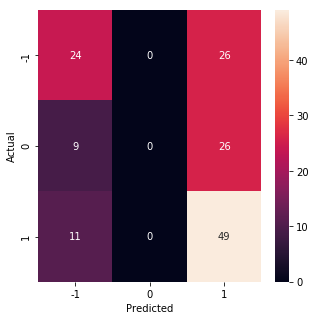

In [105]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=[-1,0,1], 
            yticklabels=[-1,0,1])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [30]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
predictor = ['Lineup_Home_Value','Lineup_Visit_Value']
X = match_lst_value[predictor]
y = match_lst_value['Result']
logreg.fit(X, y)
y_pred = logreg.predict(X)
match_lst_value['Result_pred'] = logreg.predict(X)
match_lst_value['Home_win_pred_prob'] = logreg.predict_proba(X)[:, 2]
match_lst_value['Draw_pred_prob'] = logreg.predict_proba(X)[:, 1]
match_lst_value['Visit_win_pred_prob'] = logreg.predict_proba(X)[:, 0]


In [31]:
logreg.predict_proba(X)

array([[0.09016219, 0.21610546, 0.69373236],
       [0.73717941, 0.15314698, 0.10967361],
       [0.2509237 , 0.32060467, 0.42847164],
       ...,
       [0.33714732, 0.31855074, 0.34430194],
       [0.32574194, 0.31778922, 0.35646884],
       [0.34310183, 0.30311187, 0.35378629]])

In [108]:
match_lst_value

,League,Home,Visit,Lineup_Home,Lineup_Visit,Score,Diff,Lineup_Home_Value,Lineup_Visit_Value,Result,Result_pred,Home_win_pred_prob,Draw_pred_prob,Visit_win_pred_prob
0,EPL,Manchester United,Leicester City,"[David de Gea, Victor Lindelöf, Eric Bailly, L...","[Kasper Schmeichel, Wes Morgan, Harry Maguire,...",2:1,1,"682,199,783.10","332,780,382.00",1,1,0.69,0.22,0.09
1,EPL,Newcastle United,Tottenham Hotspur,"[Martin Dubravka, Ciaran Clark, Jamaal Lascell...","[Hugo Lloris, Jan Vertonghen, Davinson Sánchez...",1:2,-1,"139,919,024.25","857,665,802.70",-1,-1,0.11,0.15,0.74
2,EPL,AFC Bournemouth,Cardiff City,"[Asmir Begovic, Nathan Aké, Steve Cook, Charli...","[Neil Etheridge, Sean Morrison, Bruno Ecuele M...",2:0,2,"162,608,595.75","62,774,481.15",1,1,0.43,0.32,0.25
3,EPL,Fulham FC,Crystal Palace,"[Fabri, Maxime Le Marchand, Calum Chambers, Jo...","[Wayne Hennessey, Mamadou Sakho, James Tomkins...",0:2,-2,"242,022,096.00","208,744,057.80",-1,1,0.43,0.30,0.27
4,EPL,Watford FC,Brighton & Hove Albion,"[Ben Foster, Craig Cathcart, Christian Kabasel...","[Mathew Ryan, Shane Duffy, Lewis Dunk, Bernard...",2:0,2,"145,969,576.65","131,221,355.17",1,1,0.39,0.31,0.30
5,EPL,Huddersfield Town,Chelsea FC,"[Ben Hamer, Terence Kongolo, Zanka, Christophe...","[Kepa, Antonio Rüdiger, David Luiz, Marcos Alo...",0:3,-3,"111,178,900.35","756,319,050.00",-1,-1,0.12,0.17,0.70
6,EPL,Wolverhampton Wanderers,Everton FC,"[Rui Patrício, Ryan Bennett, Willy Boly, Conor...","[Jordan Pickford, Michael Keane, Phil Jagielka...",2:2,0,"230,677,310.25","357,738,910.65",0,-1,0.35,0.28,0.36
7,EPL,Liverpool FC,West Ham United,"[Alisson, Virgil van Dijk, Joe Gomez, Andrew R...","[Lukasz Fabianski, Angelo Ogbonna, Fabián Balb...",4:0,4,"965,063,107.80","222,357,800.70",1,1,0.84,0.14,0.02
8,EPL,Southampton FC,Burnley FC,"[Alex McCarthy, Wesley Hoedt, Jannik Vestergaa...","[Joe Hart, Ben Mee, James Tarkowski, Stephen W...",0:0,0,"217,819,886.40","154,289,086.20",0,1,0.43,0.31,0.26
9,EPL,Arsenal FC,Manchester City,"[Petr Cech, Sokratis, Shkodran Mustafi, Ainsle...","[Ederson, Aymeric Laporte, John Stones, Benjam...",0:2,-2,"524,885,420.70","915,146,050.50",-1,-1,0.32,0.21,0.47


In [39]:
match_lst_value['Result'].value_counts()

 1    206
-1    150
 0    125
Name: Result, dtype: int64

accuracy score

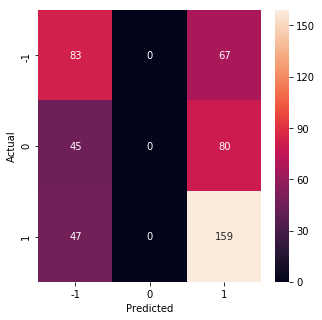

In [37]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
conf_mat = confusion_matrix(y, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=[-1,0,1], 
            yticklabels=[-1,0,1])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(match_lst_value['Result_pred'], y)

0.5031185031185031

In [33]:
len(match_lst_value[(match_lst_value['Home_win_pred_prob']>0.5) & (match_lst_value['Result']== 1)]) / len(match_lst_value[match_lst_value['Home_win_pred_prob']>0.5])

0.7155963302752294

In [35]:
len(match_lst_value[(match_lst_value['Home_win_pred_prob']>0.8) & (match_lst_value['Result']== 1)]) / len(match_lst_value[match_lst_value['Home_win_pred_prob']>0.8])

0.8571428571428571

In [40]:
len(match_lst_value[(match_lst_value['Visit_win_pred_prob']>0.5) & (match_lst_value['Result']== -1)]) / len(match_lst_value[match_lst_value['Visit_win_pred_prob']>0.5])

0.6451612903225806

Predict upcoming matches

In [109]:
df = pd.read_csv("players.csv")

In [1475]:
df

,League,Club,Name,Age,Position,Nationality,Market_Value,Name_en,Club_en,Market_Value_CAD,Position_g
0,EPL,Manchester City,Ederson,25,Goalkeeper,Brazil,£54.00m,Ederson,Manchester City,"90,758,286.00",G
1,EPL,Manchester City,Arijanet Muric,19,Goalkeeper,Kosovo,£450k,Arijanet Muric,Manchester City,"756,319.05",G
2,EPL,Manchester City,Aymeric Laporte,24,Centre-Back,France,£45.00m,Aymeric Laporte,Manchester City,"75,631,905.00",D
3,EPL,Manchester City,Eliaquim Mangala,27,Centre-Back,France,£13.50m,Eliaquim Mangala,Manchester City,"22,689,571.50",D
4,EPL,Manchester City,Philippe Sandler,21,Centre-Back,Netherlands,£2.25m,Philippe Sandler,Manchester City,"3,781,595.25",D
5,EPL,Manchester City,Kyle Walker,28,Right-Back,England,£45.00m,Kyle Walker,Manchester City,"75,631,905.00",D
6,EPL,Manchester City,Fernandinho,33,Defensive Midfield,Brazil,£13.50m,Fernandinho,Manchester City,"22,689,571.50",M
7,EPL,Manchester City,Fabian Delph,28,Central Midfield,England,£13.50m,Fabian Delph,Manchester City,"22,689,571.50",M
8,EPL,Manchester City,Phil Foden,18,Central Midfield,England,£13.50m,Phil Foden,Manchester City,"22,689,571.50",M
9,EPL,Manchester City,David Silva,32,Attacking Midfield,Spain,£27.00m,David Silva,Manchester City,"45,379,143.00",M


In [117]:
df['Name_en'] =  df['Name_en'].str.title()

df['Position_g'] = df['Position'].replace({'Goalkeeper':'G', 'Centre-Back':'D', 'Right-Back':'D', 'Left-Back':'D', 
                                          'Defensive Midfield':'M','Central Midfield':'M','Attacking Midfield':'M','Right Midfield':'M','Left Midfield':'M',
                                          'Left Winger':'M/F', 'Right Winger':'M/F', 'Second Striker':'F','Centre-Forward':'F'})

df['Club_en'] = df['Club_en'].replace({'SC Amiens':'Amiens SC', 'Stade Rennais FC':'Rennes', 'Celta de Vigo':'Celta Vigo',
                                        '1.FC Nuremberg':'1. FC Nurnberg','Vancouver Whitecaps':'Vancouver Whitecaps FC',
                                        'AS Saint-Etienne':'St. Etienne', 'Bayer 04 Leverkusen':'Bayer Leverkusen','Hertha BSC':'Hertha BSC Berlin',
                                        'Los Angeles FC':'Los Angeles Football Club'})

df['Name_en'] = df['Name_en'].replace({'Thomas': 'Thomas Partey', 'Djene':'Dakonam Djene', 'Virgil Misidjan':'Vura', 
                                       'Alejandro Romero Gamarra':'Kaku', 'Ali Ghazal':'Aly Ghazal',
                                       'Kepa':'Kepa Arrizabalaga', "Stanley N'Soki":'Stanley Nsoki', 'Rodrigo':'Rodrigo Moreno',
                                       'Alberto Garcia':'Alberto Garcia Cabrera', 'Jose Angel':'Cote',
                                       'Cucho':'Juan Hernandez Suarez','Vitorino Antunes':'Vitorino Atunes', 'Ismael Bennacer':'Ismael Benaccer',
                                       'Steven Nzonzi':"Steven N'Zonzi", 'Miranda':'Joao Miranda','Thiago':'Thiago Alcantara'})


In [110]:
lst = ['ENG','LIGA','BUND','SERI','FRAN','MLS','UCL']
league_name = ['EPL','LaLiga','Bundesliga','SerieA','Ligue1','MLS','UCL']
match_coming = []
for l,y in zip(lst,league_name):
    
    lineup_url = 'https://www.rotowire.com/soccer/lineups.php?league='+l
    lineup_request = urllib.request.Request(lineup_url, headers={'User-Agent': 'Mozilla/5.0'})
    lineup_source = urllib.request.urlopen(lineup_request).read()
    lineup_soup = BeautifulSoup(lineup_source, 'html.parser')
    lineup = lineup_soup.findAll(class_="lineup is-soccer")
   
    for x in lineup:
        home = x.find(class_="lineup__mteam is-home").get_text()
        visit = x.find(class_="lineup__mteam is-visit").get_text()
        time = x.find(class_="lineup__time").get_text()
        lineup_home = x.find(class_="lineup__list is-home").findAll(class_="lineup__player")
        lineup_home_lst = [x.get_text().strip() for x in lineup_home]
        lineup_visit = x.find(class_="lineup__list is-visit").findAll(class_="lineup__player")
        lineup_visit_lst = [x.get_text().strip() for x in lineup_visit]
        lineup_status = x.find(class_="lineup__status").get_text()
        
        match_coming.append([y, time.strip(), home.strip(), visit.strip(), lineup_status.strip(), lineup_home_lst, lineup_visit_lst])

In [111]:
match_lst_coming = pd.DataFrame(match_coming, columns=['League','Time', 'Home', 'Visit', 'Confirmed/Expected', 'Lineup_Home', 'Lineup_Visit'])

In [112]:
match_lst_coming['Home'] = match_lst_coming['Home'].apply(unidecode.unidecode)
match_lst_coming['Visit'] = match_lst_coming['Visit'].apply(unidecode.unidecode)

In [113]:
match_lst_coming

,League,Time,Home,Visit,Confirmed/Expected,Lineup_Home,Lineup_Visit
0,EPL,November 3 8:30 AM ET,AFC Bournemouth,Manchester United,Expected Lineup,"[G\nA. Begovic, D\nNathan Ake, D\nS. Francis, ...","[G\nDavid de Gea, D\nC. Smalling, D\nLuke Shaw..."
1,EPL,November 3 11:00 AM ET,Cardiff City,Leicester City,Expected Lineup,"[G\nN. Etheridge, D\nJ. Bennett, D\nS. Bamba, ...","[G\nK. Schmeichel, D\nWes Morgan, D\nH. Maguir..."
2,EPL,November 3 11:00 AM ET,Everton,Brighton & Hove Albion,Expected Lineup,"[G\nJ. Pickford, D\nS. Coleman, D\nM. Keane, D...","[G\nMathew Ryan, D\nShane Duffy, D\nBruno, D\n..."
3,EPL,November 3 11:00 AM ET,West Ham United,Burnley,Expected Lineup,"[G\nL. Fabianski, D\nP. Zabaleta, D\nA. Ogbonn...","[G\nJoe Hart, D\nM. Lowton, D\nBen Mee, D\nJ. ..."
4,EPL,November 3 11:00 AM ET,Newcastle United,Watford,Expected Lineup,"[G\nM. Dubravka, D\nJ. Lascelles, D\nF. Fernan...","[G\nBen Foster, D\nC. Cathcart, D\nA. Mariappa..."
5,EPL,November 3 1:30 PM ET,Arsenal,Liverpool,Expected Lineup,"[G\nBernd Leno, D\nS. Mustafi, D\nS. Lichtstei...","[G\nAlisson, D\nT. Alexander-Arnold, D\nJoe Go..."
6,EPL,November 3 3:45 PM ET,Wolverhampton,Tottenham Hotspur,Expected Lineup,"[G\nRui Patricio, D\nRyan Bennett, D\nConor Co...","[G\nHugo Lloris, D\nT. Alderweireld, D\nD. San..."
7,EPL,November 4 10:00 AM ET,Manchester City,Southampton,Expected Lineup,"[G\nEderson, D\nB. Mendy, D\nA. Laporte, D\nJo...","[G\nA. McCarthy, D\nJ. Stephens, D\nR. Bertran..."
8,EPL,November 4 11:00 AM ET,Chelsea,Crystal Palace,Expected Lineup,"[G\nK. Arrizabalaga, D\nA. Rudiger, D\nDavid L...","[G\nW. Hennessey, D\nJ. Tomkins, D\nM. Sakho, ..."
9,EPL,November 5 3:00 PM ET,Huddersfield Town,Fulham,Expected Lineup,"[G\nJonas Lossl, D\nZanka, D\nChris Lowe, D\nC...","[G\nSergio Rico, D\nM. Le Marchand, D\nT. Fosu..."


In [118]:
def transfermkt_rotowire_link(data, team, f):
    position = f.split('\n')[0]
    name = f.split('\n')[1].title()
    name = unidecode.unidecode(name)
    if len(name.split('. ')) == 1:
        info = data[(data['Club_en'].str.contains(team))&
                    ((data['Name_en'].str.contains(name.split(' ')[0]))&
                    (data['Name_en'].str.contains(name.split(' ')[-1].split('-')[0])))]
    else:
        info = data[(data['Club_en'].str.contains(team))&
                    ((data['Name_en'].str[:1].str.contains(name.split('. ')[0])))&
                    (data['Name_en'].str.contains(name.split('. ')[1]))]
        if len(info) == 0:
             info = data[(data['Club_en'].str.contains(team))&
                        (data['Name_en'].str.contains(name.split('. ')[1].split(' ')[0].split('-')[0]))]
        
        elif len(info) > 1:
                info = info[(info['Position_g'].str.contains(position.split('/')[0]))|
                            (info['Position_g'].str.contains(position.split('/')[-1]))]
        
    return info 

In [119]:
def lineup_value(data, team, lineup):

    s = 0
    for f in lineup:
        info = transfermkt_rotowire_link(data, team, f)
         
        if len(info) == 1:
            s += info.squeeze()['Market_Value_CAD']

        else:
            return 'wrong lineup'
    return s

In [120]:
v_lst = []
for x in league_name:
    for index, row in match_lst_coming[match_lst_coming['League']== x].iterrows():
        league = row['League']
        home = row['Home']
        visit = row['Visit']
        lineup_home = row['Lineup_Home']
        lineup_visit = row['Lineup_Visit']
        data = df[df['League']==league]
        v_lst.append([x, home, visit, lineup_value(data, home, lineup_home), lineup_value(data, visit, lineup_visit)])

In [121]:
lineup_value_coming = pd.DataFrame(v_lst, columns=['League', 'Home','Visit', 'Lineup_Home_Value', 'Lineup_Visit_Value'])

In [122]:
match_lst_coming_value = pd.merge(match_lst_coming, lineup_value_coming)
df_value = match_lst_coming_value[(match_lst_coming_value['Confirmed/Expected'] == 'Expected Lineup') | 
                                  (match_lst_coming_value['Confirmed/Expected'] == 'Confirmed Lineup')]

In [123]:
import warnings
warnings.filterwarnings("ignore")

predictor = ['Lineup_Home_Value','Lineup_Visit_Value']
X = df_value[predictor]
df_value['Result_pred'] = logreg.predict(X)
df_value['Home_win_pred_prob'] = logreg.predict_proba(X)[:, 2]
df_value['Draw_pred_prob'] = logreg.predict_proba(X)[:, 1]
df_value['Visit_win_pred_prob'] = logreg.predict_proba(X)[:, 0]

In [124]:
df_value

,League,Time,Home,Visit,Confirmed/Expected,Lineup_Home,Lineup_Visit,Lineup_Home_Value,Lineup_Visit_Value,Result_pred,Home_win_pred_prob,Draw_pred_prob,Visit_win_pred_prob
0,EPL,November 3 8:30 AM ET,AFC Bournemouth,Manchester United,Expected Lineup,"[G\nA. Begovic, D\nNathan Ake, D\nS. Francis, ...","[G\nDavid de Gea, D\nC. Smalling, D\nLuke Shaw...","202,693,505.40","821,362,488.30",-1,0.15,0.18,0.68
1,EPL,November 3 11:00 AM ET,Cardiff City,Leicester City,Expected Lineup,"[G\nN. Etheridge, D\nJ. Bennett, D\nS. Bamba, ...","[G\nK. Schmeichel, D\nWes Morgan, D\nH. Maguir...","74,119,266.90","322,191,915.30",-1,0.25,0.27,0.47
2,EPL,November 3 11:00 AM ET,Everton,Brighton & Hove Albion,Expected Lineup,"[G\nJ. Pickford, D\nS. Coleman, D\nM. Keane, D...","[G\nMathew Ryan, D\nShane Duffy, D\nBruno, D\n...","385,722,715.50","120,632,888.47",1,0.57,0.28,0.15
3,EPL,November 3 11:00 AM ET,West Ham United,Burnley,Expected Lineup,"[G\nL. Fabianski, D\nP. Zabaleta, D\nA. Ogbonn...","[G\nJoe Hart, D\nM. Lowton, D\nBen Mee, D\nJ. ...","216,307,248.30","151,263,810.00",1,0.43,0.31,0.26
4,EPL,November 3 11:00 AM ET,Newcastle United,Watford,Expected Lineup,"[G\nM. Dubravka, D\nJ. Lascelles, D\nF. Fernan...","[G\nBen Foster, D\nC. Cathcart, D\nA. Mariappa...","156,558,043.35","119,498,409.90",1,0.40,0.32,0.28
5,EPL,November 3 1:30 PM ET,Arsenal,Liverpool,Expected Lineup,"[G\nBernd Leno, D\nS. Mustafi, D\nS. Lichtstei...","[G\nAlisson, D\nT. Alexander-Arnold, D\nJoe Go...","580,096,711.35","738,167,392.80",1,0.46,0.24,0.31
6,EPL,November 3 3:45 PM ET,Wolverhampton,Tottenham Hotspur,Expected Lineup,"[G\nRui Patricio, D\nRyan Bennett, D\nConor Co...","[G\nHugo Lloris, D\nT. Alderweireld, D\nD. San...","230,677,310.25","907,582,860.00",-1,0.13,0.16,0.70
7,EPL,November 4 10:00 AM ET,Manchester City,Southampton,Expected Lineup,"[G\nEderson, D\nB. Mendy, D\nA. Laporte, D\nJo...","[G\nA. McCarthy, D\nJ. Stephens, D\nR. Bertran...","900,019,669.50","214,794,610.20",1,0.82,0.15,0.03
8,EPL,November 4 11:00 AM ET,Chelsea,Crystal Palace,Expected Lineup,"[G\nK. Arrizabalaga, D\nA. Rudiger, D\nDavid L...","[G\nW. Hennessey, D\nJ. Tomkins, D\nM. Sakho, ...","945,398,812.50","189,079,762.50",1,0.84,0.14,0.02
9,EPL,November 5 3:00 PM ET,Huddersfield Town,Fulham,Expected Lineup,"[G\nJonas Lossl, D\nZanka, D\nChris Lowe, D\nC...","[G\nSergio Rico, D\nM. Le Marchand, D\nT. Fosu...","85,464,052.65","267,736,943.70",-1,0.28,0.29,0.43


In [129]:
df_value[(df_value['Home_win_pred_prob'] > 0.8) | (df_value['Visit_win_pred_prob'] > 0.8)]

,League,Time,Home,Visit,Confirmed/Expected,Lineup_Home,Lineup_Visit,Lineup_Home_Value,Lineup_Visit_Value,Result_pred,Home_win_pred_prob,Draw_pred_prob,Visit_win_pred_prob
7,EPL,November 4 10:00 AM ET,Manchester City,Southampton,Expected Lineup,"[G\nEderson, D\nB. Mendy, D\nA. Laporte, D\nJo...","[G\nA. McCarthy, D\nJ. Stephens, D\nR. Bertran...","900,019,669.50","214,794,610.20",1,0.82,0.15,0.03
8,EPL,November 4 11:00 AM ET,Chelsea,Crystal Palace,Expected Lineup,"[G\nK. Arrizabalaga, D\nA. Rudiger, D\nDavid L...","[G\nW. Hennessey, D\nJ. Tomkins, D\nM. Sakho, ...","945,398,812.50","189,079,762.50",1,0.84,0.14,0.02
11,LaLiga,November 3 11:15 AM ET,Real Madrid,Valladolid,Expected Lineup,"[G\nT. Courtois, D\nSergio Ramos, D\nNacho, D\...","[G\nJordi Masip, D\nJavi Moyano, D\nCalero, D\...","818,337,212.10","22,840,835.31",1,0.82,0.15,0.02
13,LaLiga,November 3 3:45 PM ET,Rayo Vallecano,Barcelona,Expected Lineup,"[G\nA. Garcia Cabrera, D\nAlex Moreno, D\nL. A...","[G\nM. ter Stegen, D\nJordi Alba, D\nGerard Pi...","49,312,002.06","966,575,745.90",-1,0.06,0.11,0.83
39,Ligue1,November 2 3:45 PM ET,Paris Saint-Germain,Lille,Expected Lineup,"[G\nG. Buffon, D\nMarquinhos, D\nJuan Bernat, ...","[G\nMike Maignan, D\nJose Fonte, D\nA. Soumaor...","1,022,543,355.60","142,187,981.40",1,0.87,0.12,0.01


In [82]:
def lineup_value_each(league, data, team, lineup, v=[]):

    for f in lineup:
        info = transfermkt_rotowire_link(data, team, f)

        if len(info) == 1:
            v.append([league, team, info.squeeze()['Name'],info.squeeze()['Market_Value_CAD']])
        elif len(info) == 0:
            v.append([league, team, 0, 0])
        else:
            v.append([league, team, info['Name'], 0])
    return v

In [83]:
v_home = []
v_visit = []
v=[]
for x in league_name:
    for index, row in match_lst_coming[match_lst_coming['League']== x].iterrows():
        league = row['League']
        home = row['Home']
        visit = row['Visit']
        lineup_home = row['Lineup_Home']
        lineup_visit = row['Lineup_Visit']
        data = df[df['League']==league]
        v_home = lineup_value_each(league, data, home, lineup_home, v)
        v_visit = lineup_value_each(league, data, visit, lineup_visit,v)
        

In [85]:
v_visit

[['EPL', 'AFC Bournemouth', 'Asmir Begovic', 12101104.8],
 ['EPL', 'AFC Bournemouth', 'Nathan Aké', 37815952.5],
 ['EPL', 'AFC Bournemouth', 'Simon Francis', 3781595.25],
 ['EPL', 'AFC Bournemouth', 'Steve Cook', 15126381.0],
 ['EPL', 'AFC Bournemouth', 'Charlie Daniels', 5294233.35],
 ['EPL', 'AFC Bournemouth', 'Adam Smith', 7563190.5],
 ['EPL', 'AFC Bournemouth', 'Ryan Fraser', 15126381.0],
 ['EPL', 'AFC Bournemouth', 'Jefferson Lerma', 37815952.5],
 ['EPL', 'AFC Bournemouth', 'Lewis Cook', 30252762.0],
 ['EPL', 'AFC Bournemouth', 'David Brooks', 15126381.0],
 ['EPL', 'AFC Bournemouth', 'Callum Wilson', 22689571.5],
 ['EPL', 'Manchester United', 'David de Gea', 105884667.0],
 ['EPL', 'Manchester United', 'Chris Smalling', 27227485.8],
 ['EPL', 'Manchester United', 'Luke Shaw', 27227485.8],
 ['EPL', 'Manchester United', 'Victor Lindelöf', 37815952.5],
 ['EPL', 'Manchester United', 'Ashley Young', 10588466.7],
 ['EPL', 'Manchester United', 'Paul Pogba', 136137429.0],
 ['EPL', 'Manchest

In [86]:
df_home = pd.DataFrame(v_home, columns = ['League', 'Home', 'Name', 'Value'])
df_home[(df_home['Value']==0) & (df_home['Name']!=0)]

,League,Home,Name,Value


In [87]:
df_visit = pd.DataFrame(v_visit, columns = ['League', 'Visit', 'Name', 'Value'])
df_visit[(df_visit['Value']==0) & (df_visit['Name']!=0)]

,League,Visit,Name,Value


In [90]:
df_home[df_home['Home']=='Manchester City']

,League,Home,Name,Value
154,EPL,Manchester City,Ederson,"90,758,286.00"
155,EPL,Manchester City,Benjamin Mendy,"68,068,714.50"
156,EPL,Manchester City,Aymeric Laporte,"75,631,905.00"
157,EPL,Manchester City,John Stones,"83,195,095.50"
158,EPL,Manchester City,Kyle Walker,"75,631,905.00"
159,EPL,Manchester City,David Silva,"45,379,143.00"
160,EPL,Manchester City,Fernandinho,"22,689,571.50"
161,EPL,Manchester City,Riyad Mahrez,"90,758,286.00"
162,EPL,Manchester City,Bernardo Silva,"90,758,286.00"
163,EPL,Manchester City,Raheem Sterling,"136,137,429.00"
